In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy

In [2]:
start_page=2
end_page=2
start_url = 'https://www.newsbomb.gr/search?q=metoo&page=2'

test_url = start_url + str(start_page)

In [3]:
#article_url = 'https://www.newsbomb.gr/ellada/story/1170218/elliniko-metoo-h-yperaspistiki-grammi-toy-lignadi-kleinei-i-proanakrisi-gia-ton-deytero-ithopoio'

In [4]:
response = requests.get(start_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [5]:
newsbomb_article_list = doc.find('div',  attrs={'class': 'news-items grid-cards card-list lines'}).find_all('a')


In [6]:
link_list = []

for i in newsbomb_article_list:
  url = 'https://www.newsbomb.gr' + i['href']
  if url not in link_list:
    link_list.append(url)

In [7]:
full_articles_list = []

for url in link_list:
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  article_dict = {}

  try:
    title = soup.find('h1').text
    article_dict['title'] = title
  except:
    article_dict['title'] = ''
    pass

  try:
    summary = soup.find('div' , {'class' : "main-text story-fulltext"}).text.replace("\n", "").replace("\t", "")
    article_dict['summary'] = summary
  except:
    article_dict['summary'] = ''
    pass

  try:
    author = soup.find('p' , {'class': "main-author story-author"}).text.strip()
    article_dict['author'] = author
  except:
    article_dict['author'] = ''
    pass

  try:
    date = soup.find('time')['datetime']
     #('div', {'class': 'item-meta-area'}).find('time').text.strip()
    article_dict['date'] = date
  except:
    article_dict['date'] = 'No date found'

  full_articles_list.append(article_dict)

In [8]:
article_df = pd.DataFrame(full_articles_list)

In [9]:
article_df.head(5)

title  \
0  Ελληνικό #metoo: Από την προφυλάκιση Λιγνάδη σ...   
1  Δημήτρης Σταρόβας για ελληνικό #metoo: Υπάρχει...   
2  Εβδομάδα εξελίξεων για το ελληνικό #metoo - Τρ...   
3  Γεννηματά - #metoo: Το να σπάσουμε τη σιωπή εί...   
4  Γαλλία - #MeToo: Καθιστική διαμαρτυρία μπροστά...   

                                             summary         author  \
0  Μπορεί από τις 26 Ιανουαρίου μέχρι σήμερα να β...  Σοφία Σπίγγου   
1  Για τις καταγγελίες περί σεξουαλικής κακοποίησ...       Newsbomb   
2  Στα τέλη της εβδομάδας αναμένεται να περάσει τ...  Σοφία Σπίγγου   
3  Το Κίνημα Αλλαγής διοργάνωσε το απόγευμα διαδι...       Newsbomb   
4  Σε ένα δελτίο τύπου, που ανήρτησε στους λογαρι...       Newsbomb   

                        date  
0  2021-05-16T06:10:51+03:00  
1  2021-04-30T12:49:14+03:00  
2  2021-04-17T06:40:58+03:00  
3  2021-03-07T20:14:13+02:00  
4  2021-03-01T23:59:42+02:00

In [10]:
for index, row in article_df.iterrows():
  if ("Φεβρουαρίου" not in row["date"]):
    article_df.drop(index)
article_df

title  \
0   Ελληνικό #metoo: Από την προφυλάκιση Λιγνάδη σ...   
1   Δημήτρης Σταρόβας για ελληνικό #metoo: Υπάρχει...   
2   Εβδομάδα εξελίξεων για το ελληνικό #metoo - Τρ...   
3   Γεννηματά - #metoo: Το να σπάσουμε τη σιωπή εί...   
4   Γαλλία - #MeToo: Καθιστική διαμαρτυρία μπροστά...   
5   Οι 10 παρεμβάσεις που ανακοίνωσε ο Μητσοτάκης ...   
6   LIVE BLOG Βουλή: Η «σύγκρουση» για το ελληνικό...   
7   Μετωπική στη Βουλή για το ελληνικό #MeToo - Νο...   
8   Ελληνικό #metoo: Μαρτυρία «φωτιά» για τον δεύτ...   
9   Ελληνικό #metoo: Η υπερασπιστική γραμμή του Λι...   
10  Ελληνικό #metoo: Νέος πρωταγωνιστής στο επίκεν...   
11  Ελληνικό #metoo: Νέο πρόσωπο στο «στόχαστρο» τ...   
12  Ελληνικό #metoo: Οι καταγγελίες, οι μηνύσεις κ...   
13     «Νεύρα» στο #MeToo με το... ποίημα του Σον Πεν   
14  Αυτή η πασίγνωστη τραγουδίστρια... σαμποτάρει ...   
15  Η Σιένα Μίλερ εξήρε το κίνημα #MeToo σε εκδήλω...   
16  Το #MeToo «χτύπησε» και το... Σαλόνι Αυτοκινήτ...   
17                      Το #MeToo έφτασε στο... Ιράν!   
18  #MeToo: Κίνημα κατά της σεξουαλικής παρενόχλησ...   

                                              summary                 author  \
0   Μπορεί από τις 26 Ιανουαρίου μέχρι σήμερα να β...          Σοφία Σπίγγου   
1   Για τις καταγγελίες περί σεξουαλικής κακοποίησ...               Newsbomb   
2   Στα τέλη της εβδομάδας αναμένεται να περάσει τ...          Σοφία Σπίγγου   
3   Το Κίνημα Αλλαγής διοργάνωσε το απόγευμα διαδι...               Newsbomb   
4   Σε ένα δελτίο τύπου, που ανήρτησε στους λογαρι...               Newsbomb   
5   Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...               Newsbomb   
6   Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  Μάριος Καλογερόπουλος   
7   «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...        Κατσαρέλη Σοφία   
8   Καταιγιστικές αναμένονται οι εξελίξεις και στη...               Newsbomb   
9   Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...          Σοφία Σπίγγου   
10  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...          Σοφία Σπίγγου   
11  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...          Σοφία Σπίγγου   
12  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...          Σοφία Σπίγγου   
13  Στο καινούργιο του βιβλίο, με τίτλο «Bob Honey...               Newsbomb   
14  Η Αγγλίδα τραγουδίστρια - τραγουδοποιός, ηθοπο...               Newsbomb   
15  Η τελευταία ηθοποιός που πρόσθεσε τη φωνή της ...               Newsbomb   
16  Αυτή τη χρόνια στο Σαλόνι Αυτοκινήτου τη Γενεύ...               Newsbomb   
17  Η επίσημη ηθική θέλει τη γυναίκα να είναι υπεύ...               Newsbomb   
18  Τις τελευταίες ώρες στο Twitter, πολλές είναι ...               Newsbomb   

                         date  
0   2021-05-16T06:10:51+03:00  
1   2021-04-30T12:49:14+03:00  
2   2021-04-17T06:40:58+03:00  
3   2021-03-07T20:14:13+02:00  
4   2021-03-01T23:59:42+02:00  
5   2021-02-25T14:10:28+02:00  
6   2021-02-25T09:53:49+02:00  
7   2021-02-25T06:00:07+02:00  
8   2021-02-23T06:23:01+02:00  
9   2021-02-23T06:00:01+02:00  
10  2021-02-22T19:06:01+02:00  
11  2021-02-22T06:00:18+02:00  
12  2021-02-13T06:35:44+02:00  
13  2018-03-31T19:42:55+03:00  
14  2018-03-31T15:31:00+03:00  
15  2018-03-24T08:30:45+02:00  
16  2018-03-18T09:30:06+02:00  
17  2018-03-18T07:30:54+02:00  
18  2017-10-17T14:27:52+03:00

In [11]:
article_df['datetime'] = pd.to_datetime(article_df['date'],utc=True)
article_df['year'] = pd.DatetimeIndex(article_df['datetime'], ).year
article_df['month'] = pd.DatetimeIndex(article_df['datetime']).month
article_df['day'] = pd.DatetimeIndex(article_df['datetime']).day
article_df['hour'] = pd.DatetimeIndex(article_df['datetime']).hour

In [12]:
article_df

title  \
0   Ελληνικό #metoo: Από την προφυλάκιση Λιγνάδη σ...   
1   Δημήτρης Σταρόβας για ελληνικό #metoo: Υπάρχει...   
2   Εβδομάδα εξελίξεων για το ελληνικό #metoo - Τρ...   
3   Γεννηματά - #metoo: Το να σπάσουμε τη σιωπή εί...   
4   Γαλλία - #MeToo: Καθιστική διαμαρτυρία μπροστά...   
5   Οι 10 παρεμβάσεις που ανακοίνωσε ο Μητσοτάκης ...   
6   LIVE BLOG Βουλή: Η «σύγκρουση» για το ελληνικό...   
7   Μετωπική στη Βουλή για το ελληνικό #MeToo - Νο...   
8   Ελληνικό #metoo: Μαρτυρία «φωτιά» για τον δεύτ...   
9   Ελληνικό #metoo: Η υπερασπιστική γραμμή του Λι...   
10  Ελληνικό #metoo: Νέος πρωταγωνιστής στο επίκεν...   
11  Ελληνικό #metoo: Νέο πρόσωπο στο «στόχαστρο» τ...   
12  Ελληνικό #metoo: Οι καταγγελίες, οι μηνύσεις κ...   
13     «Νεύρα» στο #MeToo με το... ποίημα του Σον Πεν   
14  Αυτή η πασίγνωστη τραγουδίστρια... σαμποτάρει ...   
15  Η Σιένα Μίλερ εξήρε το κίνημα #MeToo σε εκδήλω...   
16  Το #MeToo «χτύπησε» και το... Σαλόνι Αυτοκινήτ...   
17                      Το #MeToo έφτασε στο... Ιράν!   
18  #MeToo: Κίνημα κατά της σεξουαλικής παρενόχλησ...   

                                              summary                 author  \
0   Μπορεί από τις 26 Ιανουαρίου μέχρι σήμερα να β...          Σοφία Σπίγγου   
1   Για τις καταγγελίες περί σεξουαλικής κακοποίησ...               Newsbomb   
2   Στα τέλη της εβδομάδας αναμένεται να περάσει τ...          Σοφία Σπίγγου   
3   Το Κίνημα Αλλαγής διοργάνωσε το απόγευμα διαδι...               Newsbomb   
4   Σε ένα δελτίο τύπου, που ανήρτησε στους λογαρι...               Newsbomb   
5   Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...               Newsbomb   
6   Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  Μάριος Καλογερόπουλος   
7   «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...        Κατσαρέλη Σοφία   
8   Καταιγιστικές αναμένονται οι εξελίξεις και στη...               Newsbomb   
9   Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...          Σοφία Σπίγγου   
10  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...          Σοφία Σπίγγου   
11  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...          Σοφία Σπίγγου   
12  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...          Σοφία Σπίγγου   
13  Στο καινούργιο του βιβλίο, με τίτλο «Bob Honey...               Newsbomb   
14  Η Αγγλίδα τραγουδίστρια - τραγουδοποιός, ηθοπο...               Newsbomb   
15  Η τελευταία ηθοποιός που πρόσθεσε τη φωνή της ...               Newsbomb   
16  Αυτή τη χρόνια στο Σαλόνι Αυτοκινήτου τη Γενεύ...               Newsbomb   
17  Η επίσημη ηθική θέλει τη γυναίκα να είναι υπεύ...               Newsbomb   
18  Τις τελευταίες ώρες στο Twitter, πολλές είναι ...               Newsbomb   

                         date                  datetime  year  month  day  \
0   2021-05-16T06:10:51+03:00 2021-05-16 03:10:51+00:00  2021      5   16   
1   2021-04-30T12:49:14+03:00 2021-04-30 09:49:14+00:00  2021      4   30   
2   2021-04-17T06:40:58+03:00 2021-04-17 03:40:58+00:00  2021      4   17   
3   2021-03-07T20:14:13+02:00 2021-03-07 18:14:13+00:00  2021      3    7   
4   2021-03-01T23:59:42+02:00 2021-03-01 21:59:42+00:00  2021      3    1   
5   2021-02-25T14:10:28+02:00 2021-02-25 12:10:28+00:00  2021      2   25   
6   2021-02-25T09:53:49+02:00 2021-02-25 07:53:49+00:00  2021      2   25   
7   2021-02-25T06:00:07+02:00 2021-02-25 04:00:07+00:00  2021      2   25   
8   2021-02-23T06:23:01+02:00 2021-02-23 04:23:01+00:00  2021      2   23   
9   2021-02-23T06:00:01+02:00 2021-02-23 04:00:01+00:00  2021      2   23   
10  2021-02-22T19:06:01+02:00 2021-02-22 17:06:01+00:00  2021      2   22   
11  2021-02-22T06:00:18+02:00 2021-02-22 04:00:18+00:00  2021      2   22   
12  2021-02-13T06:35:44+02:00 2021-02-13 04:35:44+00:00  2021      2   13   
13  2018-03-31T19:42:55+03:00 2018-03-31 16:42:55+00:00  2018      3   31   
14  2018-03-31T15:31:00+03:00 2018-03-31 12:31:00+00:00  2018      3   31   
15  2018-03-24T08:30:45+02:00 2018-03-24 06:30:45+00:00  2018      3   24 

In [13]:
article_df_feb = article_df.loc[article_df['month']  == 2]
article_df_feb

title  \
5   Οι 10 παρεμβάσεις που ανακοίνωσε ο Μητσοτάκης ...   
6   LIVE BLOG Βουλή: Η «σύγκρουση» για το ελληνικό...   
7   Μετωπική στη Βουλή για το ελληνικό #MeToo - Νο...   
8   Ελληνικό #metoo: Μαρτυρία «φωτιά» για τον δεύτ...   
9   Ελληνικό #metoo: Η υπερασπιστική γραμμή του Λι...   
10  Ελληνικό #metoo: Νέος πρωταγωνιστής στο επίκεν...   
11  Ελληνικό #metoo: Νέο πρόσωπο στο «στόχαστρο» τ...   
12  Ελληνικό #metoo: Οι καταγγελίες, οι μηνύσεις κ...   

                                              summary                 author  \
5   Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...               Newsbomb   
6   Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  Μάριος Καλογερόπουλος   
7   «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...        Κατσαρέλη Σοφία   
8   Καταιγιστικές αναμένονται οι εξελίξεις και στη...               Newsbomb   
9   Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...          Σοφία Σπίγγου   
10  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...          Σοφία Σπίγγου   
11  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...          Σοφία Σπίγγου   
12  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...          Σοφία Σπίγγου   

                         date                  datetime  year  month  day  \
5   2021-02-25T14:10:28+02:00 2021-02-25 12:10:28+00:00  2021      2   25   
6   2021-02-25T09:53:49+02:00 2021-02-25 07:53:49+00:00  2021      2   25   
7   2021-02-25T06:00:07+02:00 2021-02-25 04:00:07+00:00  2021      2   25   
8   2021-02-23T06:23:01+02:00 2021-02-23 04:23:01+00:00  2021      2   23   
9   2021-02-23T06:00:01+02:00 2021-02-23 04:00:01+00:00  2021      2   23   
10  2021-02-22T19:06:01+02:00 2021-02-22 17:06:01+00:00  2021      2   22   
11  2021-02-22T06:00:18+02:00 2021-02-22 04:00:18+00:00  2021      2   22   
12  2021-02-13T06:35:44+02:00 2021-02-13 04:35:44+00:00  2021      2   13   

    hour  
5     12  
6      7  
7      4  
8      4  
9      4  
10    17  
11     4  
12     4

Text(0.5, 1.02, ' Newsbomb: Συχνότητα εμφάνισης της κάθε ημέρας')

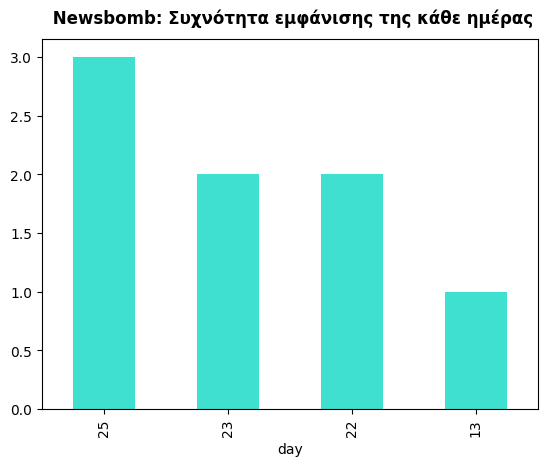

In [14]:
article_df_feb['day'].value_counts().plot(kind='bar', color='turquoise')

plt.title(' Newsbomb: Συχνότητα εμφάνισης της κάθε ημέρας', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Αριθμός των άρθρων τον Φεβρουάριο')

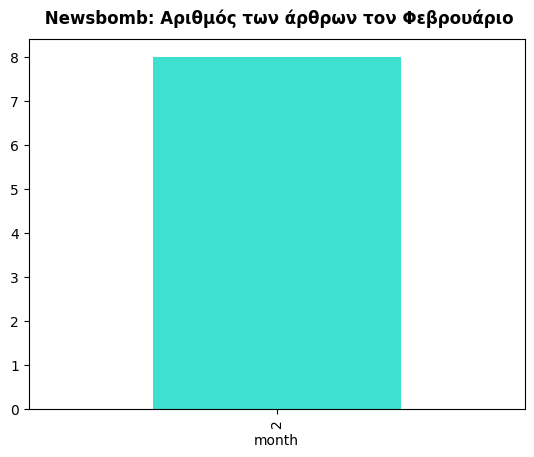

In [15]:
article_df_feb['month'].value_counts().plot(kind='bar' , color='turquoise')
plt.title(' Newsbomb: Αριθμός των άρθρων τον Φεβρουάριο', y=1.02, fontweight='bold')

In [16]:
import seaborn as sns

In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
import spacy

In [20]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 75.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [22]:
nlp = spacy.load('el_core_news_sm')

In [23]:
text = article_df_feb['summary'].str.cat(sep = ' ')

In [24]:
full_doc= nlp(text)

In [25]:
full_doc[:200]

Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδικα με τις οποίες αφενός αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας και αφετέρου τις αλλαγές στον χρόνο παραγραφής σεξουαλικής κακοποίησης ανηλίκων.Όπως εξήγησε ο Κυριάκος Μητσοτάκης οι πρωτοβουλίες που ανακοίνωσε έχουν διπλό στόχο «πρώτον, να ενισχυθεί ακόμα περισσότερο το νομικό μας οπλοστάσιο για τη δίκαιη τιμωρία των ενόχων του παρελθόντος και του παρόντος. Αλλά κυρίως να αποτραπούν τα εγκλήματα του μέλλοντος, δημιουργώντας ένα πλαίσιο ασφάλειας και εμπιστοσύνης σε κάθε πολίτη».Σύμφωνα με τον ίδιο: Αλλάζει ο Ποινικός Κώδικας και αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας. Σε ό,τι δε αφορά τους ανήλικους, η παραγραφή αναστέλλεται μέχρι την ενηλικίωση του θύματος, με νέα ηλικιακά όρια. Ενώ συγκεκριμένες υποθέσεις θα εκδικάζονται πια κατά προτεραιότητα.Εγκαινιάζεται επίσης μία κεντρική διαδικτυακή πύλη, metoo.gov.gr, όπου θα συγκεντρώνονται όλες οι πληροφορίες και όλες οι πολι

In [26]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [27]:
lemmatized_text[:1000]

'Κορυφαία παρέμβαση ο αλλαγή σε ο ποινικός κώδικας με ο οποίος αφενός αυστηροποιώ ο ποινές για ο αδίκημα κατά ο γενετήσια ελευθερία και αφετέρου ο αλλαγή σε ο χρόνος παραγραφή σεξουαλικός κακοποίηση ανηλίκων . όπως εξηγώ ο Κυριάκος Μητσοτάκης ο πρωτοβουλία που ανακοινώνω έχω διπλός στόχος « πρώτον , να ενισχυθεί ακόμα πολύ ο νομικός μου οπλοστάσιος για ο δίκαιη τιμωρία ο ενόχων ο παρελθόν και ο παρόν . αλλά κυρίως να αποτραπούν ο εγκλήματα ο μέλλοντος , δημιουργώντας ένας πλαίσιο ασφάλεια και εμπιστοσύνη σε κάθε πολίτη».Σύμφωνα με ο ίδιος : Αλλάζω ο ποινικός κώδικας και αυστηροποιώ ο ποινές για ο αδίκημα κατά ο γενετήσια ελευθερία . σε ό , τι δε αφορώ ο ανήλικος , ο παραγραφή αναστέλλω μέχρι ο ενηλικίωση ο θύματος , με νέος ηλικιακός όριο . ενώ συγκεκριμένος υπόθεση θα εκδικάζονται πια κατά προτεραιότητα . Εγκαινιάζεται επίσης ένας κεντρικός διαδικτυακός πύλη , metoo.gov.gr , όπου θα συγκεντρώνονμαι όλος ο πληροφορία και όλος ο πολιτική μου γύρω από αυτός ο θέμα . αλλά κυρίως θα μπορώ 

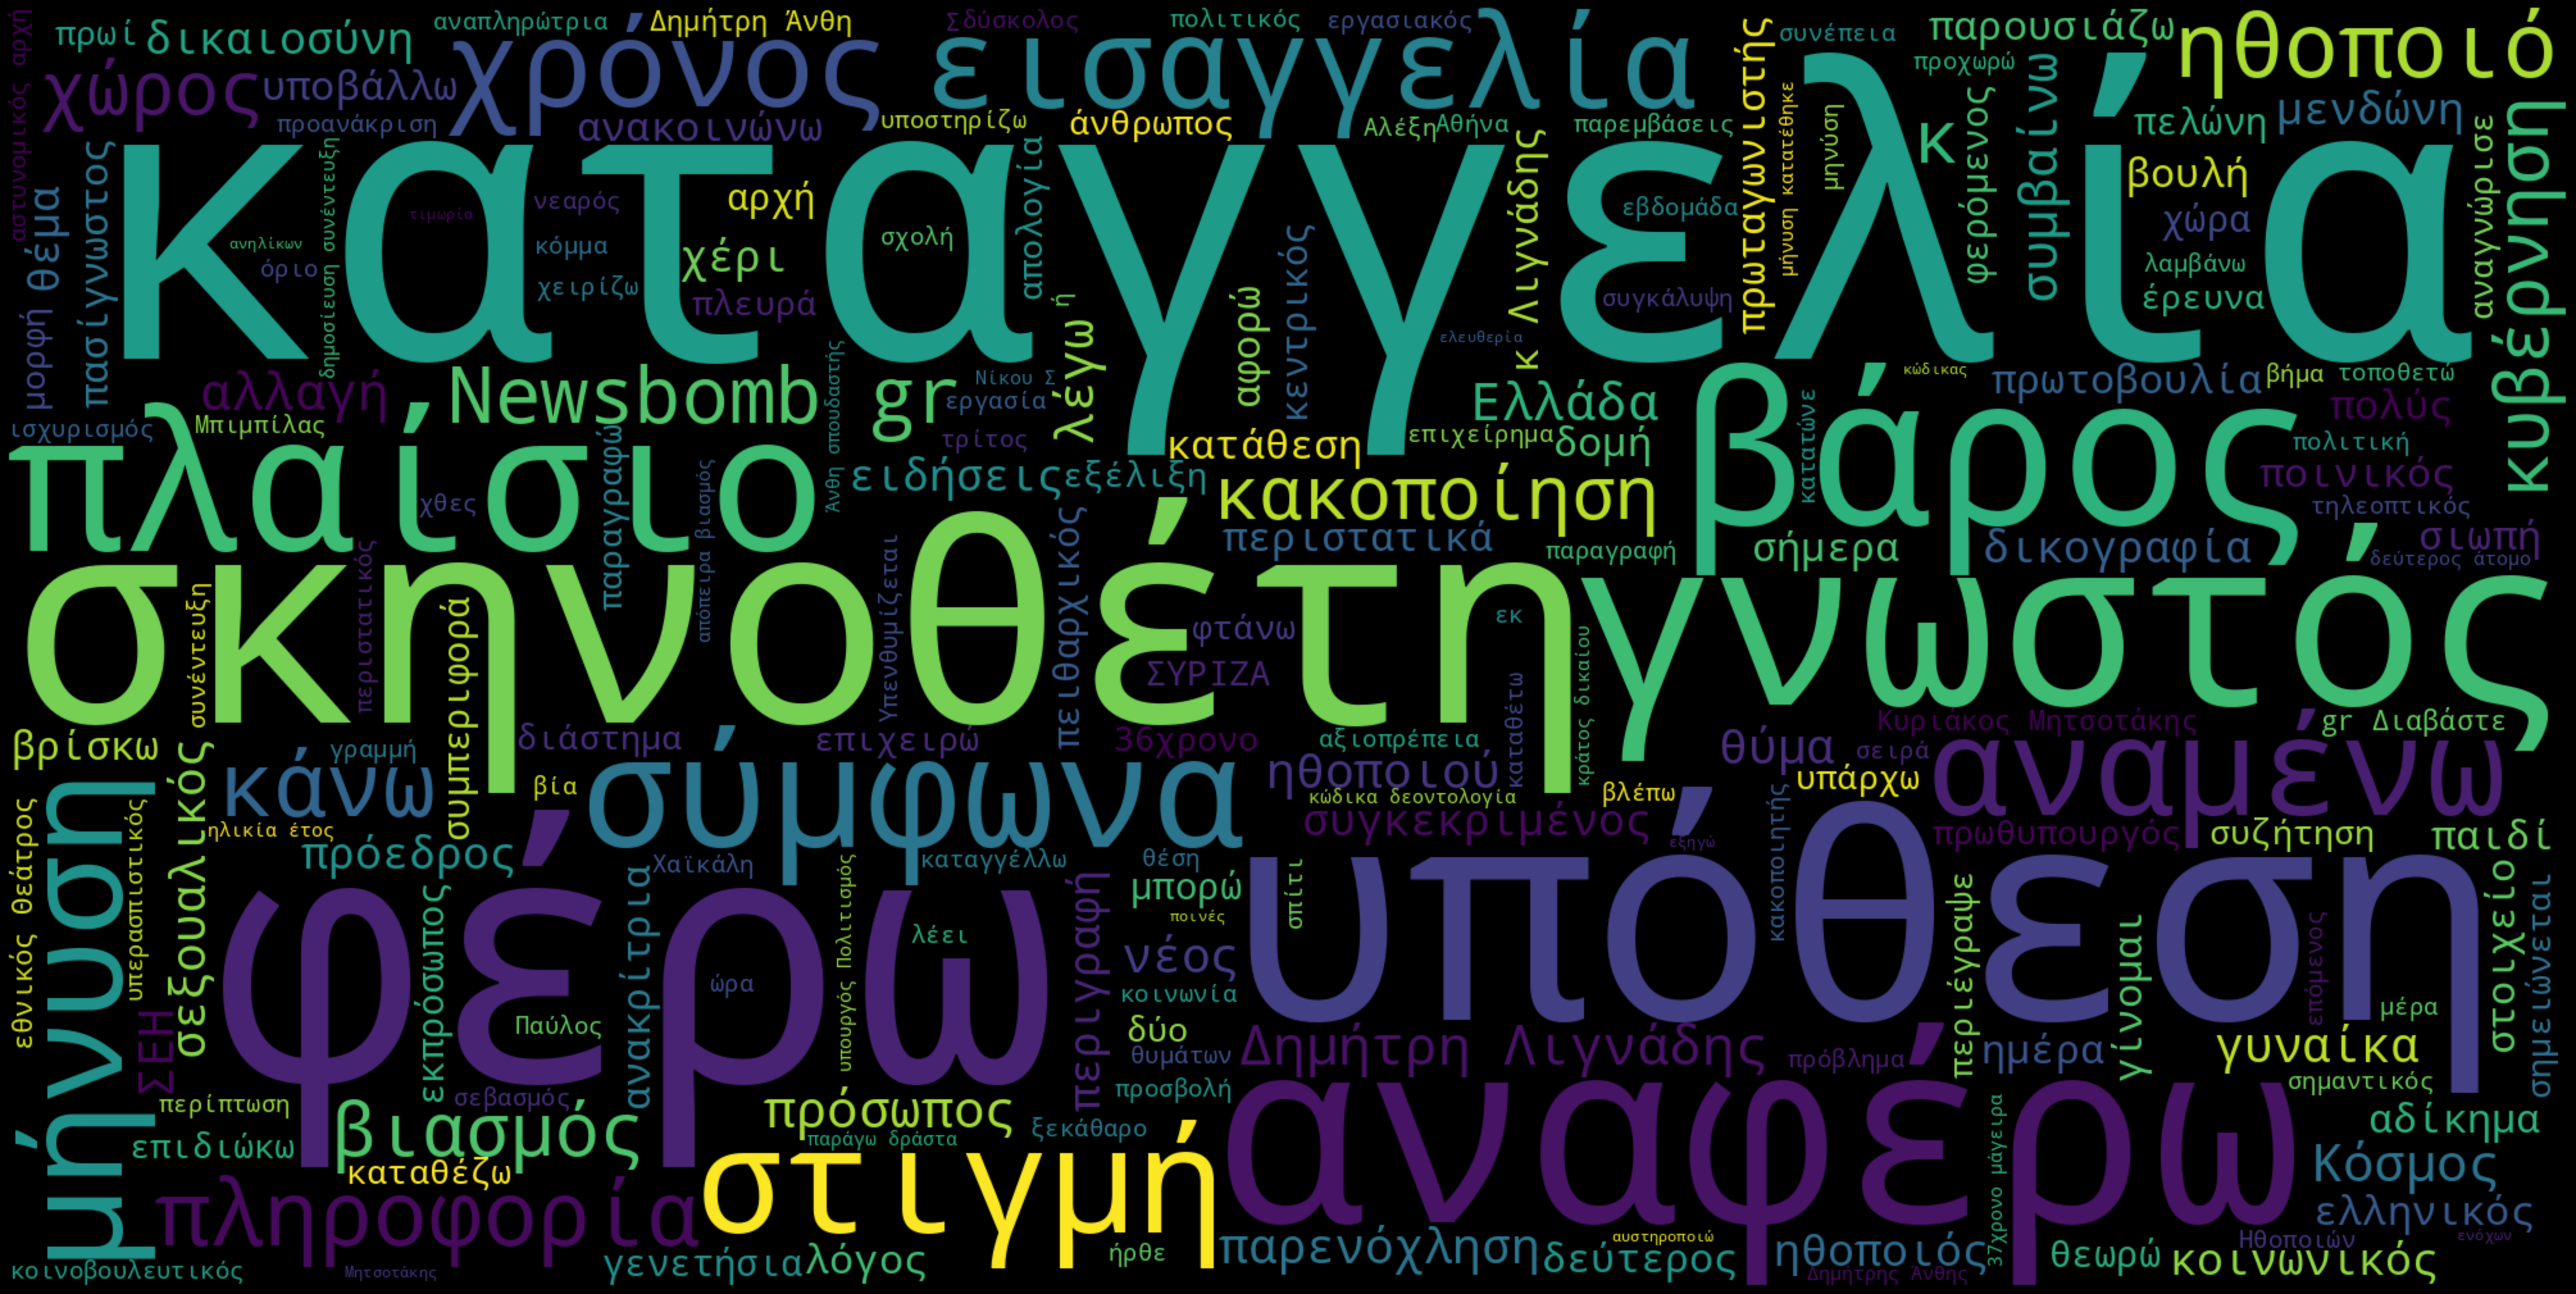

In [28]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
print(article_df_feb.index)

Index([5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [30]:
doc = nlp(article_df_feb['summary'][5])

In [31]:
for token in doc:
    print(token, token.lemma_)

Κορυφαία Κορυφαία
παρέμβαση παρέμβαση
οι ο
αλλαγές αλλαγή
στον σε ο
ποινικό ποινικός
κώδικα κώδικας
με με
τις ο
οποίες οποίος
αφενός αφενός
αυστηροποιούνται αυστηροποιώ
οι ο
ποινές ποινές
για για
τα ο
αδικήματα αδίκημα
κατά κατά
της ο
γενετήσιας γενετήσια
ελευθερίας ελευθερία
και και
αφετέρου αφετέρου
τις ο
αλλαγές αλλαγή
στον σε ο
χρόνο χρόνος
παραγραφής παραγραφή
σεξουαλικής σεξουαλικός
κακοποίησης κακοποίηση
ανηλίκων ανηλίκων
. .
Όπως όπως
εξήγησε εξηγώ
ο ο
Κυριάκος Κυριάκος
Μητσοτάκης Μητσοτάκης
οι ο
πρωτοβουλίες πρωτοβουλία
που που
ανακοίνωσε ανακοινώνω
έχουν έχω
διπλό διπλός
στόχο στόχος
« «
πρώτον πρώτον
, ,
να να
ενισχυθεί ενισχυθεί
ακόμα ακόμα
περισσότερο πολύ
το ο
νομικό νομικός
μας μου
οπλοστάσιο οπλοστάσιος
για για
τη ο
δίκαιη δίκαιη
τιμωρία τιμωρία
των ο
ενόχων ενόχων
του ο
παρελθόντος παρελθόν
και και
του ο
παρόντος παρόν
. .
Αλλά αλλά
κυρίως κυρίως
να να
αποτραπούν αποτραπούν
τα ο
εγκλήματα εγκλήματα
του ο
μέλλοντος μέλλοντος
, ,
δημιουργώντας δημιουργώντας
ένα ένας
πλαί

In [32]:
' '.join(token.lemma_ for token in doc)

'Κορυφαία παρέμβαση ο αλλαγή σε ο ποινικός κώδικας με ο οποίος αφενός αυστηροποιώ ο ποινές για ο αδίκημα κατά ο γενετήσια ελευθερία και αφετέρου ο αλλαγή σε ο χρόνος παραγραφή σεξουαλικός κακοποίηση ανηλίκων . όπως εξηγώ ο Κυριάκος Μητσοτάκης ο πρωτοβουλία που ανακοινώνω έχω διπλός στόχος « πρώτον , να ενισχυθεί ακόμα πολύ ο νομικός μου οπλοστάσιος για ο δίκαιη τιμωρία ο ενόχων ο παρελθόν και ο παρόν . αλλά κυρίως να αποτραπούν ο εγκλήματα ο μέλλοντος , δημιουργώντας ένας πλαίσιο ασφάλεια και εμπιστοσύνη σε κάθε πολίτη».Σύμφωνα με ο ίδιος : Αλλάζω ο ποινικός κώδικας και αυστηροποιώ ο ποινές για ο αδίκημα κατά ο γενετήσια ελευθερία . σε ό , τι δε αφορώ ο ανήλικος , ο παραγραφή αναστέλλω μέχρι ο ενηλικίωση ο θύματος , με νέος ηλικιακός όριο . ενώ συγκεκριμένος υπόθεση θα εκδικάζονται πια κατά προτεραιότητα . Εγκαινιάζεται επίσης ένας κεντρικός διαδικτυακός πύλη , metoo.gov.gr , όπου θα συγκεντρώνονμαι όλος ο πληροφορία και όλος ο πολιτική μου γύρω από αυτός ο θέμα . αλλά κυρίως θα μπορώ 

In [33]:
text

"Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδικα με τις οποίες αφενός αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας και αφετέρου τις αλλαγές στον χρόνο παραγραφής σεξουαλικής κακοποίησης ανηλίκων.Όπως εξήγησε ο Κυριάκος Μητσοτάκης οι πρωτοβουλίες που ανακοίνωσε έχουν διπλό στόχο «πρώτον, να ενισχυθεί ακόμα περισσότερο το νομικό μας οπλοστάσιο για τη δίκαιη τιμωρία των ενόχων του παρελθόντος και του παρόντος. Αλλά κυρίως να αποτραπούν τα εγκλήματα του μέλλοντος, δημιουργώντας ένα πλαίσιο ασφάλειας και εμπιστοσύνης σε κάθε πολίτη».Σύμφωνα με τον ίδιο: Αλλάζει ο Ποινικός Κώδικας και αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας. Σε ό,τι δε αφορά τους ανήλικους, η παραγραφή αναστέλλεται μέχρι την ενηλικίωση του θύματος, με νέα ηλικιακά όρια. Ενώ συγκεκριμένες υποθέσεις θα εκδικάζονται πια κατά προτεραιότητα.Εγκαινιάζεται επίσης μία κεντρική διαδικτυακή πύλη, metoo.gov.gr, όπου θα συγκεντρώνονται όλες οι πληροφορίες και όλες οι πολ

In [34]:
full_doc = nlp(text)

In [35]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [36]:
clear_text[200:400]

'ηλίκων . όπως εξηγώ ο Κυριάκος Μητσοτάκης ο πρωτοβουλία που ανακοινώνω έχω διπλός στόχος « πρώτον , να ενισχυθεί ακόμα πολύ ο νομικός μου οπλοστάσιος για ο δίκαιη τιμωρία ο ενόχων ο παρελθόν και ο παρ'

In [37]:
list(nlp.Defaults.stop_words)[0:20]

['άνευ',
 'μου',
 'καμίαν',
 'συχνάς',
 'μπρος',
 'τούτη',
 'όλες',
 'μπορούν',
 'συχνή',
 'τόσο',
 'αν',
 'καθόλου',
 'τη',
 'οτιδήποτε',
 'δηλαδή',
 'τάχα',
 'εκείνην',
 'έχουμε',
 'όταν',
 'τούτης']

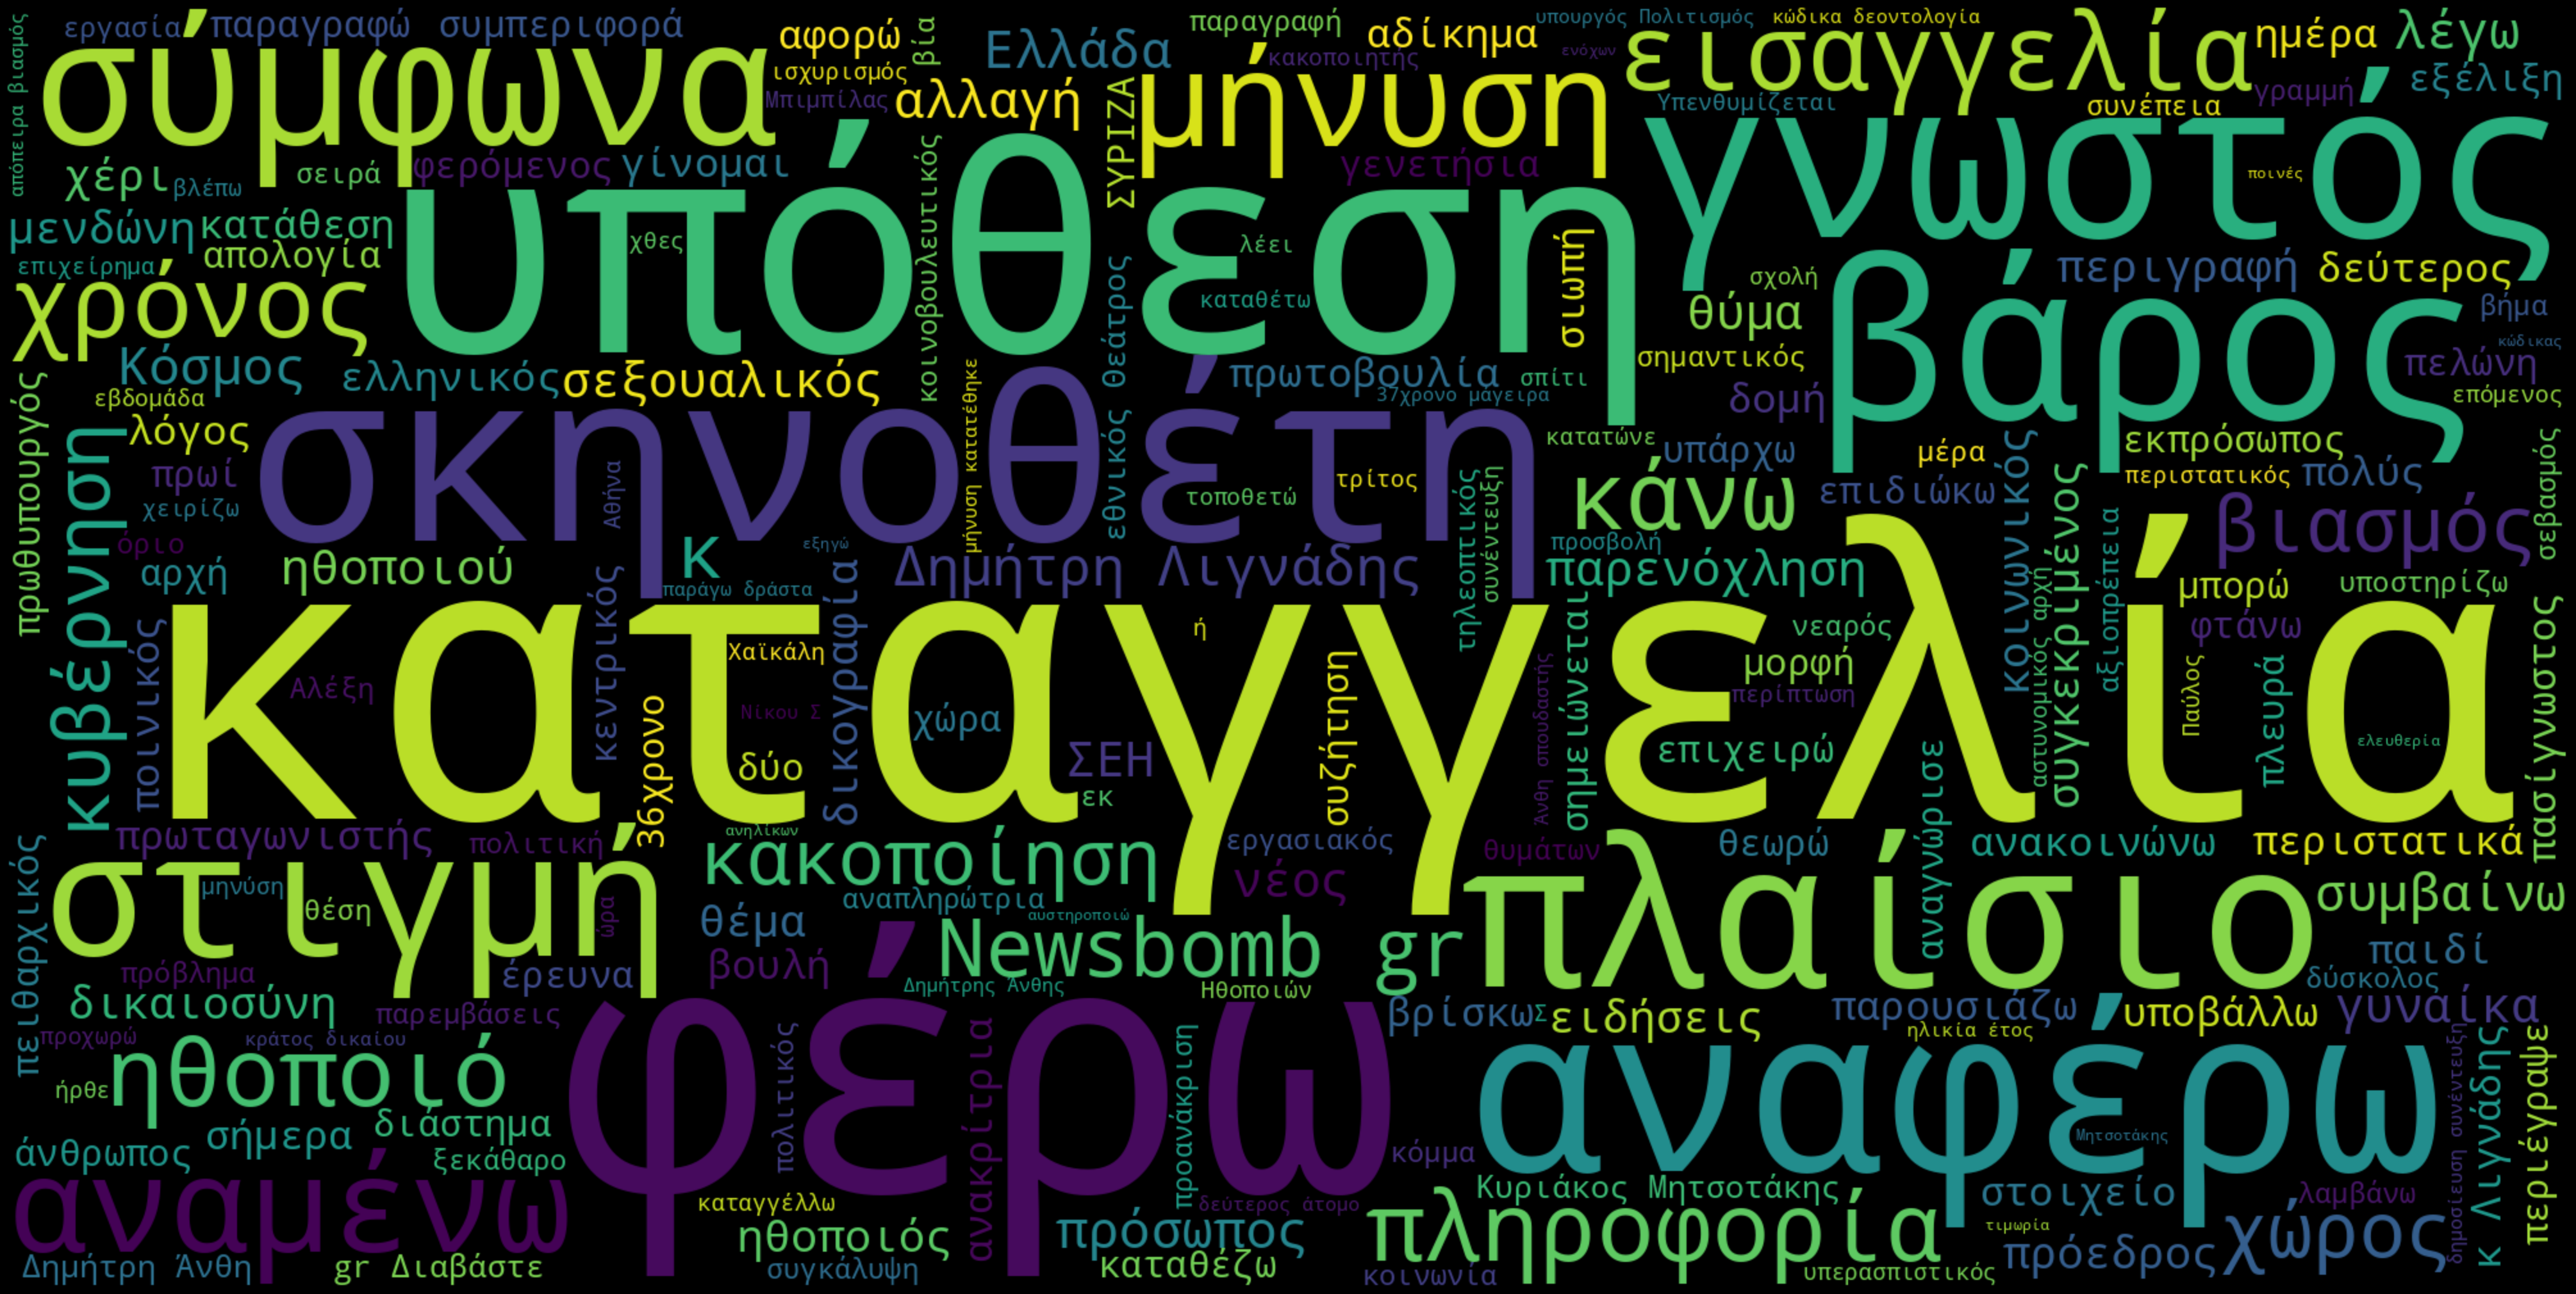

In [38]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer()

In [41]:
count_vector = cv.fit_transform(article_df_feb['summary'])

In [42]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

0103οι  1000  11  14  15  17  19  190  1995  19ης  ...  όσα  όσο  όσους  \
0       1     0   0   0   0   0   0    1     0     0  ...    0    0      1   
1       0     0   1   0   0   0   0    0     0     0  ...    1    1      0   
2       0     0   3   0   0   0   0    0     0     0  ...    1    1      0   
3       0     0   0   0   0   0   0    0     0     0  ...    0    0      0   
4       0     0   0   1   0   0   1    0     0     1  ...    0    0      0   

   όταν  ότι  όχι  ύποπτο  ώμους  ώρα  ώστε  
0     0    0    1       0      0    0     0  
1     0    4    0       0      0    0     0  
2     1    6    0       0      0    0     0  
3     0    1    0       0      0    0     1  
4     3   11    0       1      0    2     0  

[5 rows x 1404 columns]

In [43]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [44]:
count_vector = cv.fit_transform(article_df_feb['summary'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

0103οι  1000  11  14  15  17  19  190  1995  19ης  ...  ψάχνω  ψυχολογική  \
0       1     0   0   0   0   0   0    1     0     0  ...      0           0   
1       0     0   1   0   0   0   0    0     0     0  ...      0           0   
2       0     0   3   0   0   0   0    0     0     0  ...      0           0   
3       0     0   0   0   0   0   0    0     0     0  ...      1           0   
4       0     0   0   1   0   0   1    0     0     1  ...      0           0   

   ψώνια  όπλο  όρια  όριο  όρους  ύποπτο  ώμους  ώρα  
0      0     0     1     0      0       0      0    0  
1      0     0     0     0      1       0      0    0  
2      0     0     1     0      1       0      0    0  
3      0     0     0     0      0       0      0    0  
4      1     1     0     0      0       1      0    2  

[5 rows x 1215 columns]

In [46]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [47]:
count_vector = cv.fit_transform(article_df_feb['summary'])

In [48]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

0103οι  1000  11  14  15  17  19  190  1995  19ης  ...  ψάχνω  ψυχολογική  \
0       1     0   0   0   0   0   0    1     0     0  ...      0           0   
1       0     0   1   0   0   0   0    0     0     0  ...      0           0   
2       0     0   3   0   0   0   0    0     0     0  ...      0           0   
3       0     0   0   0   0   0   0    0     0     0  ...      1           0   
4       0     0   0   1   0   0   1    0     0     1  ...      0           0   

   ψώνια  όπλο  όρια  όριο  όρους  ύποπτο  ώμους  ώρα  
0      0     0     1     0      0       0      0    0  
1      0     0     0     0      1       0      0    0  
2      0     0     1     0      1       0      0    0  
3      0     0     0     0      0       0      0    0  
4      1     1     0     0      0       1      0    2  

[5 rows x 1212 columns]

In [49]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(article_df_feb['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

gr  newsbomb  αναμένεται  βάρος  γνωστό  δημήτρη  εισαγγελία  ηθοποιό  \
0   2         1           0      0       0        0           0        0   
1   1         1           2      0       0        1           0        0   
2   1         1           1      0       0        1           0        0   
3   1         1           0      2       2        2           1        3   
4   2         2           2      6       2        5           2        2   

   καταγγελία  καταγγελίες  λιγνάδη  μήνυση  πλαίσιο  πληροφορίες  σκηνοθέτη  \
0           0            1        0       0        1            1          0   
1           0            0        3       1        2            0          0   
2           0            1        3       2        3            0          0   
3           0            0        1       3        0            1          3   
4           1            1        6       3        2            5          6   

   στιγμή  συμβαίνουν  σύμφωνα  υπόθεση  φέρεται  
0       1           1        1        0        0  
1       0           1        0        0        0  
2       2           1        0        0        0  
3       1           1        2        2        2  
4       1           1        6        3        8

In [50]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(article_df_feb['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέρνηση  κυβέρνησης  κυβερνητική
0          0           0            0
1          3           1            1
2          4           1            1
3          0           0            0
4          0           0            0

In [51]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(article_df_feb['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

gr διαβάστε  newsbomb gr  άνθη σπουδαστή  απόπειρα βιασμού  δεύτερο άτομο  \
0            1            1               0                 0              0   
1            0            1               0                 0              0   
2            0            1               0                 0              0   
3            1            1               1                 0              1   
4            1            2               1                 0              1   

   δημήτρη άνθη  δημήτρη λιγνάδη  εθνικού θεάτρου  ειδήσεις ελλάδα  \
0             0                0                0                0   
1             0                1                0                0   
2             0                1                0                1   
3             1                1                1                1   
4             1                4                1                1   

   ελλάδα κόσμο  κακοποίηση γνωστό  κακοποιητή δημήτρης  κυριάκος μητσοτάκης  \
0             1                  0                    0                    4   
1             0                  0                    0                    0   
2             1                  0                    0                    0   
3             1                  1                    1                    0   
4             1                  1                    1                    0   

   κόσμο στιγμή  μητσοτάκης ελληνικό  νίκου περιέγραψε  πρόεδρος συριζα  \
0             1                    3                 0                0   
1             0                    0                 0                2   
2             1                    0                 0                2   
3             1                    0                 1                0   
4             1                    0                 1                0   

   στιγμή συμβαίνουν  συμβαίνουν newsbomb  σύμφωνα πληροφορίες  
0                  1                    1                    0  
1                  0                    0                    0  
2                  1                    1                    0  
3                  1                    1                    1  
4                  1                    1                    3

In [52]:
results.sum(axis =0).sort_values(ascending = False)

newsbomb gr            10
δημήτρη λιγνάδη         9
συμβαίνουν newsbomb     7
στιγμή συμβαίνουν       7
κόσμο στιγμή            7
ελλάδα κόσμο            7
ειδήσεις ελλάδα         6
σύμφωνα πληροφορίες     5
πρόεδρος συριζα         4
κυριάκος μητσοτάκης     4
gr διαβάστε             4
εθνικού θεάτρου         4
δημήτρη άνθη            4
κακοποιητή δημήτρης     3
μητσοτάκης ελληνικό     3
νίκου περιέγραψε        3
δεύτερο άτομο           3
απόπειρα βιασμού        3
άνθη σπουδαστή          3
κακοποίηση γνωστό       3
dtype: int64

In [53]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

newsbomb gr            10
δημήτρη λιγνάδη         9
συμβαίνουν newsbomb     7
στιγμή συμβαίνουν       7
κόσμο στιγμή            7
dtype: int64

In [121]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['κακοποίηση', 'τέρας', 'υποστήριξη', 'θύμα', 'παραβίαση δικαιωμάτων'])
count_vector = cv.fit_transform(article_df_feb['summary'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κακοποίηση  τέρας  υποστήριξη  θύμα  παραβίαση δικαιωμάτων
0           0      0           0     0                      0
1           1      0           0     0                      0
2           1      0           0     0                      0
3           1      0           0     0                      0
4           1      0           0     1                      0

from matplotlib import pyplot as plt
_df_24['κακοποίηση'].plot(kind='hist', bins=20, title='κακοποίηση')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['θύμα'].plot(kind='hist', bins=20, title='θύμα')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='κακοποίηση', y='θύμα', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['κακοποίηση']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'κακοποίηση'}, axis=1)
              .sort_values('κακοποίηση', ascending=True))
  xs = counted['κακοποίηση']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('κακοποίηση', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('κακοποίηση')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['τέρας']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'τέρας'}, axis=1)
              .sort_values('τέρας', ascending=True))
  xs = counted['τέρας']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['υποστήριξη']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'υποστήριξη'}, axis=1)
              .sort_values('υποστήριξη', ascending=True))
  xs = counted['υποστήριξη']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('υποστήριξη', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('υποστήριξη')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['θύμα']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'θύμα'}, axis=1)
              .sort_values('θύμα', ascending=True))
  xs = counted['θύμα']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('θύμα', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('θύμα')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_31['κακοποίηση'].plot(kind='line', figsize=(8, 4), title='κακοποίηση')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['θύμα'].plot(kind='line', figsize=(8, 4), title='θύμα')
plt.gca().spines[['top', 'right']].set_visible(False)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(article_df_feb['summary'])

In [57]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

11        14      2006   30        31   36χρονο   37χρονο   40χρονη  \
0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
1  0.077486  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
2  0.178564  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.0  0.000000  0.063333  0.072234  0.000000   
4  0.000000  0.043918  0.037897  0.0  0.037897  0.033228  0.037897  0.104805   

         gr      live  ...  χριστίνα    χρόνια     χρόνο      χώρα    χώρες  \
0  0.054890  0.000000  ...       0.0  0.000000  0.087154  0.000000  0.13745   
1  0.036922  0.184912  ...       0.0  0.000000  0.000000  0.077486  0.00000   
2  0.028362  0.000000  ...       0.0  0.000000  0.000000  0.059521  0.00000   
3  0.039888  0.000000  ...       0.0  0.000000  0.063333  0.000000  0.00000   
4  0.041854  0.000000  ...       0.0  0.037897  0.033228  0.000000  0.00000   

       χώρο     ψώνια      όρια     όρους       ώρα  
0  0.115720  0.000000  0.057597  0.000000  0.000000  
1  0.000000  0.000000  0.000000  0.077486  0.000000  
2  0.000000  0.000000  0.059521  0.059521  0.000000  
3  0.056061  0.000000  0.000000  0.000000  0.000000  
4  0.029412  0.043918  0.000000  0.000000  0.087835  

[5 rows x 500 columns]

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

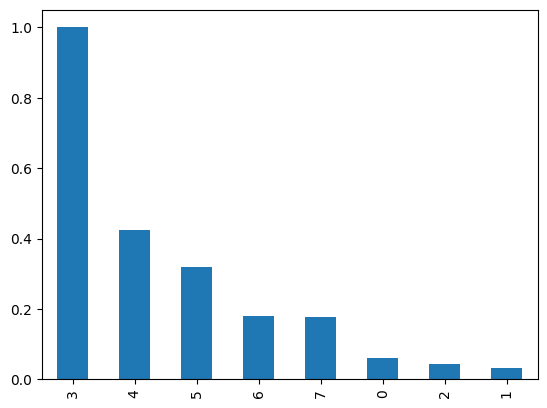

In [60]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [61]:
article_df_feb['summary'].iloc[3]

'Καταιγιστικές αναμένονται οι εξελίξεις και στην δεύτερη υπόθεση που βρίσκεται στα χέρια της δικαιοσύνης με κεντρικό πρόσωπο ηθοποιό, γνωστό από τηλεοπτικές σειρές.Ο νεαρός πρωταγωνιστής, ο οποίος ερευνάται μετά από μήνυση σε βάρος του για βιασμό και φέρεται να συνδέεται με τον Δημήτρη Λιγνάδη, σύμφωνα με πληροφορίες, έχει κληθεί σε ανωμοτί κατάθεση από τις αστυνομικές αρχές που διενεργούν την προανάκριση.Μάλιστα, φέρεται πως ασκείται «πίεση» από την εισαγγελία προκειμένου η δικογραφία να επιστρέψει στα χέρια της, καθώς η υπόθεση παραγράφεται τον Μάιο.Υπενθυμίζεται, ότι η μήνυση για βιασμό έχει υποβληθεί από τον 37χρονο μάγειρα Δημήτρη Άνθη, σπουδαστή του Εθνικού Θεάτρου στο χρόνο του περιστατικού, σε βάρος του συνομηλίκού του ηθοποιού γνωστών σίριαλ.Η συγκεκριμένη μήνυση κατατέθηκε από τον 36χρονο, μετά την δημοσίευση συνέντευξης του Νίκου Σ., ο οποίος περιέγραψε κακοποίηση από γνωστό σκηνοθέτη. Στην περιγραφή του τοποθετούσε στο χώρο και δεύτερο άτομο, στο πρόσωπο του οποίου αναγνώρι

In [62]:
article_df_feb['summary'].iloc[0]

'Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδικα με τις οποίες αφενός αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας και αφετέρου τις αλλαγές στον χρόνο παραγραφής σεξουαλικής κακοποίησης ανηλίκων.Όπως εξήγησε ο Κυριάκος Μητσοτάκης οι πρωτοβουλίες που ανακοίνωσε έχουν διπλό στόχο «πρώτον, να ενισχυθεί ακόμα περισσότερο το νομικό μας οπλοστάσιο για τη δίκαιη τιμωρία των ενόχων του παρελθόντος και του παρόντος. Αλλά κυρίως να αποτραπούν τα εγκλήματα του μέλλοντος, δημιουργώντας ένα πλαίσιο ασφάλειας και εμπιστοσύνης σε κάθε πολίτη».Σύμφωνα με τον ίδιο: Αλλάζει ο Ποινικός Κώδικας και αυστηροποιούνται οι ποινές για τα αδικήματα κατά της γενετήσιας ελευθερίας. Σε ό,τι δε αφορά τους ανήλικους, η παραγραφή αναστέλλεται μέχρι την ενηλικίωση του θύματος, με νέα ηλικιακά όρια. Ενώ συγκεκριμένες υποθέσεις θα εκδικάζονται πια κατά προτεραιότητα.Εγκαινιάζεται επίσης μία κεντρική διαδικτυακή πύλη, metoo.gov.gr, όπου θα συγκεντρώνονται όλες οι πληροφορίες και όλες οι πολ

In [63]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

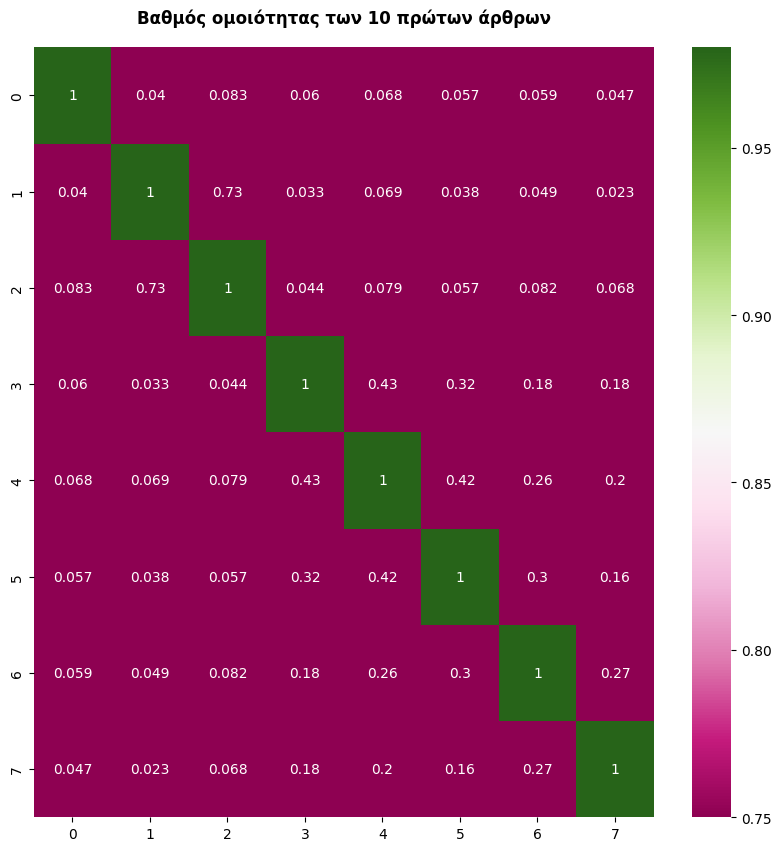

In [64]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [65]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 55.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [66]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [67]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [68]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [69]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [70]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [71]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [72]:
len(article_df_feb)

8

In [73]:
article_df_feb.head(3)

title  \
5  Οι 10 παρεμβάσεις που ανακοίνωσε ο Μητσοτάκης ...   
6  LIVE BLOG Βουλή: Η «σύγκρουση» για το ελληνικό...   
7  Μετωπική στη Βουλή για το ελληνικό #MeToo - Νο...   

                                             summary                 author  \
5  Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...               Newsbomb   
6  Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  Μάριος Καλογερόπουλος   
7  «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...        Κατσαρέλη Σοφία   

                        date                  datetime  year  month  day  hour  
5  2021-02-25T14:10:28+02:00 2021-02-25 12:10:28+00:00  2021      2   25    12  
6  2021-02-25T09:53:49+02:00 2021-02-25 07:53:49+00:00  2021      2   25     7  
7  2021-02-25T06:00:07+02:00 2021-02-25 04:00:07+00:00  2021      2   25     4

In [74]:
article_df_fa = article_df_feb[['date','summary','year',	'month'	,'day',	'hour' ]]
article_df_fa = article_df_fa.rename(columns={'summary': 'text'} )

In [75]:
article_df_fa = article_df_fa.rename(columns={'time': 'date'} )

In [76]:
article_df_fa.tail()

date  \
8   2021-02-23T06:23:01+02:00   
9   2021-02-23T06:00:01+02:00   
10  2021-02-22T19:06:01+02:00   
11  2021-02-22T06:00:18+02:00   
12  2021-02-13T06:35:44+02:00   

                                                 text  year  month  day  hour  
8   Καταιγιστικές αναμένονται οι εξελίξεις και στη...  2021      2   23     4  
9   Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...  2021      2   23     4  
10  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...  2021      2   22    17  
11  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...  2021      2   22     4  
12  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...  2021      2   13     4

In [77]:
article_df_fa.dtypes

date     object
text     object
year      int32
month     int32
day       int32
hour      int32
dtype: object

In [78]:
article_df_fa['date'] = pd.to_datetime(article_df_fa['date'])

In [79]:
article_df_fa.dtypes

date     datetime64[ns, UTC+02:00]
text                        object
year                         int32
month                        int32
day                          int32
hour                         int32
dtype: object

In [80]:
article_df_fa.head()

date  \
5 2021-02-25 14:10:28+02:00   
6 2021-02-25 09:53:49+02:00   
7 2021-02-25 06:00:07+02:00   
8 2021-02-23 06:23:01+02:00   
9 2021-02-23 06:00:01+02:00   

                                                text  year  month  day  hour  
5  Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...  2021      2   25    12  
6  Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  2021      2   25     7  
7  «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...  2021      2   25     4  
8  Καταιγιστικές αναμένονται οι εξελίξεις και στη...  2021      2   23     4  
9  Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...  2021      2   23     4

In [81]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [82]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [83]:
matrix = vec.fit_transform(article_df_fa['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [84]:
wordcount_df.shape

(8, 13161)

In [85]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [86]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [87]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [88]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [89]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
7      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
7     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
7          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [90]:
wordcount_df[trust_words].tail(1)

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
7     0               0                     0           0         0   

   εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
7             0          0      0              0             0  ...   

   ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
7                0              0               0        0        0       0   

   αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
7            0            0             0                  0  

[1 rows x 1259 columns]

In [91]:
wordcount_df[trust_words].sum(axis=1)

0    11
1    10
2    15
3     5
4    18
5     6
6     8
7     5
dtype: int64

In [92]:
article_df_fa.head(3)

date  \
5 2021-02-25 14:10:28+02:00   
6 2021-02-25 09:53:49+02:00   
7 2021-02-25 06:00:07+02:00   

                                                text  year  month  day  hour  
5  Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...  2021      2   25    12  
6  Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  2021      2   25     7  
7  «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...  2021      2   25     4

In [93]:
article_df_fa

date  \
5  2021-02-25 14:10:28+02:00   
6  2021-02-25 09:53:49+02:00   
7  2021-02-25 06:00:07+02:00   
8  2021-02-23 06:23:01+02:00   
9  2021-02-23 06:00:01+02:00   
10 2021-02-22 19:06:01+02:00   
11 2021-02-22 06:00:18+02:00   
12 2021-02-13 06:35:44+02:00   

                                                 text  year  month  day  hour  
5   Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...  2021      2   25    12  
6   Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  2021      2   25     7  
7   «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...  2021      2   25     4  
8   Καταιγιστικές αναμένονται οι εξελίξεις και στη...  2021      2   23     4  
9   Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...  2021      2   23     4  
10  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...  2021      2   22    17  
11  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...  2021      2   22     4  
12  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...  2021      2   13     4

In [94]:
article_df_fa=article_df_fa.reset_index()

In [95]:
article_df_fa['anger'] = wordcount_df[angry_words].sum(axis=1)

article_df_fa['positive'] = wordcount_df[positive_words].sum(axis=1)

article_df_fa['joy'] = wordcount_df[joy_words].sum(axis=1)

article_df_fa['disgust'] = wordcount_df[disgust_words].sum(axis=1)

article_df_fa['surprise'] = wordcount_df[surprise_words].sum(axis=1)

article_df_fa['trust'] = wordcount_df[trust_words].sum(axis=1)

article_df_fa['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

article_df_fa['sadness'] = wordcount_df[sadness_words].sum(axis=1)

article_df_fa['negative'] = wordcount_df[negative_words].sum(axis=1)

article_df_fa['fear'] = wordcount_df[fear_words].sum(axis=1)

In [96]:
article_df_fa

index                      date  \
0      5 2021-02-25 14:10:28+02:00   
1      6 2021-02-25 09:53:49+02:00   
2      7 2021-02-25 06:00:07+02:00   
3      8 2021-02-23 06:23:01+02:00   
4      9 2021-02-23 06:00:01+02:00   
5     10 2021-02-22 19:06:01+02:00   
6     11 2021-02-22 06:00:18+02:00   
7     12 2021-02-13 06:35:44+02:00   

                                                text  year  month  day  hour  \
0  Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...  2021      2   25    12   
1  Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...  2021      2   25     7   
2  «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...  2021      2   25     4   
3  Καταιγιστικές αναμένονται οι εξελίξεις και στη...  2021      2   23     4   
4  Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...  2021      2   23     4   
5  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...  2021      2   22    17   
6  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...  2021      2   22     4   
7  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...  2021      2   13     4   

   anger  positive  joy  disgust  surprise  trust  anticipation  sadness  \
0      4        14    5        2         3     11             6        5   
1      5        11    2        3         1     10             2        3   
2     10        15    2        7         2     15             6        9   
3      5         7    2        9         5      5             5        9   
4     12        32    8       20        11     18            24       18   
5      6         8    2        8         4      6             8        8   
6     18        15    5       25        11      8            10       18   
7      9        10    3       10         4      5            11       13   

   negative  fear  
0        12     3  
1         8     6  
2        18    14  
3        12    10  
4        33    25  
5        12     9  
6        28    25  
7        18    12

In [97]:
article_df_fa.reset_index(inplace=True)
article_df_fa.set_index('date', inplace=True)
article_df_fa

level_0  index  \
date                                        
2021-02-25 14:10:28+02:00        0      5   
2021-02-25 09:53:49+02:00        1      6   
2021-02-25 06:00:07+02:00        2      7   
2021-02-23 06:23:01+02:00        3      8   
2021-02-23 06:00:01+02:00        4      9   
2021-02-22 19:06:01+02:00        5     10   
2021-02-22 06:00:18+02:00        6     11   
2021-02-13 06:35:44+02:00        7     12   

                                                                        text  \
date                                                                           
2021-02-25 14:10:28+02:00  Κορυφαία παρέμβαση οι αλλαγές στον ποινικό κώδ...   
2021-02-25 09:53:49+02:00  Όπως προανήγγειλε η αναπληρώτρια κυβερνητική ε...   
2021-02-25 06:00:07+02:00  «Το τελευταίο διάστημα η ελληνική κοινωνία παρ...   
2021-02-23 06:23:01+02:00  Καταιγιστικές αναμένονται οι εξελίξεις και στη...   
2021-02-23 06:00:01+02:00  Αναξιοπιστία μαρτύρων και σκοπιμότητες μηνυτών...   
2021-02-22 19:06:01+02:00  Ο συγκεκριμένος άνθρωπος, ο οποίος δεν συγκατα...   
2021-02-22 06:00:18+02:00  Ο πρόεδρος του ΣΕΗ, Σπύρος Μπιμπίλας αναμένετα...   
2021-02-13 06:35:44+02:00  Μια συνέντευξη της Ζέτας Δούκα πριν από 2,5 εβ...   

                           year  month  day  hour  anger  positive  joy  \
date                                                                      
2021-02-25 14:10:28+02:00  2021      2   25    12      4        14    5   
2021-02-25 09:53:49+02:00  2021      2   25     7      5        11    2   
2021-02-25 06:00:07+02:00  2021      2   25     4     10        15    2   
2021-02-23 06:23:01+02:00  2021      2   23     4      5         7    2   
2021-02-23 06:00:01+02:00  2021      2   23     4     12        32    8   
2021-02-22 19:06:01+02:00  2021      2   22    17      6         8    2   
2021-02-22 06:00:18+02:00  2021      2   22     4     18        15    5   
2021-02-13 06:35:44+02:00  2021      2   13     4      9        10    3   

                           disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2021-02-25 14:10:28+02:00        2         3     11             6        5   
2021-02-25 09:53:49+02:00        3         1     10             2        3   
2021-02-25 06:00:07+02:00        7         2     15             6        9   
2021-02-23 06:23:01+02:00        9         5      5             5        9   
2021-02-23 06:00:01+02:00       20        11     18            24       18   
2021-02-22 19:06:01+02:00        8         4      6             8        8   
2021-02-22 06:00:18+02:00       25        11      8            10       18   
2021-02-13 06:35:44+02:00       10         4      5            11       13   

                           negative  fear  
date                                       
2021-02-25 14:10:28+02:00        12     3  
2021-02-25 09:53:49+02:00         8     6  
2021-02-25 06:00:07+02:00        18    14  
2021-02-23 06:23:01+02:00        12    10  
2021-02-23 06:00:01+02:00        33    25  
2021-02-22 19:06:01+02:00        12     9  
2021-02-22 06:00:18+02:00        28    25  
2021-02-13 06:35:44+02:00        18    12

<Axes: xlabel='day'>

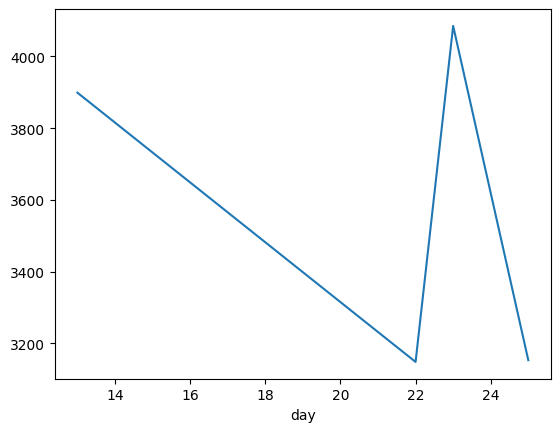

In [98]:
article_df_fa['text'].str.len().groupby(by=article_df_fa['day']).mean().plot()

<Axes: xlabel='date'>

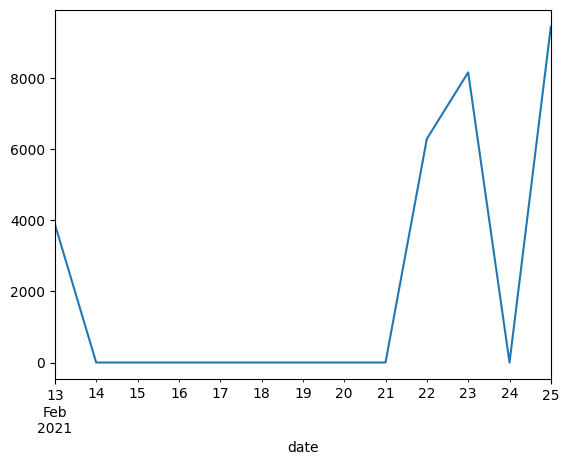

In [99]:
article_df_fa['text'].str.len().resample('D').sum().plot()

Text(0.5, 1.02, ' Newsbomb: Aριθμός των κειμένων για κάθε ημέρα')

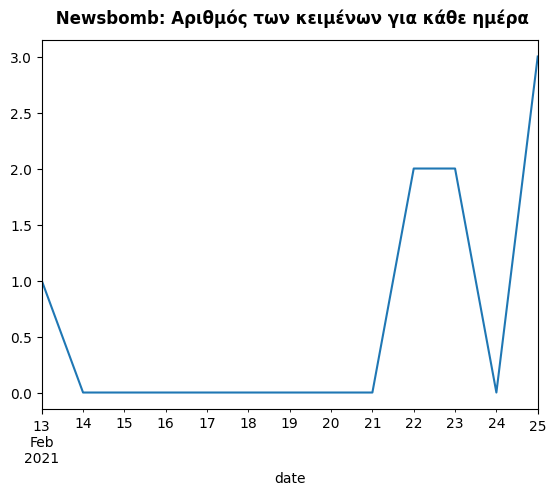

In [100]:
article_df_fa['text'].resample('D').count().plot()
plt.title(' Newsbomb: Aριθμός των κειμένων για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Η συνολική τιμή της θετικότητας για κάθε ημέρα')

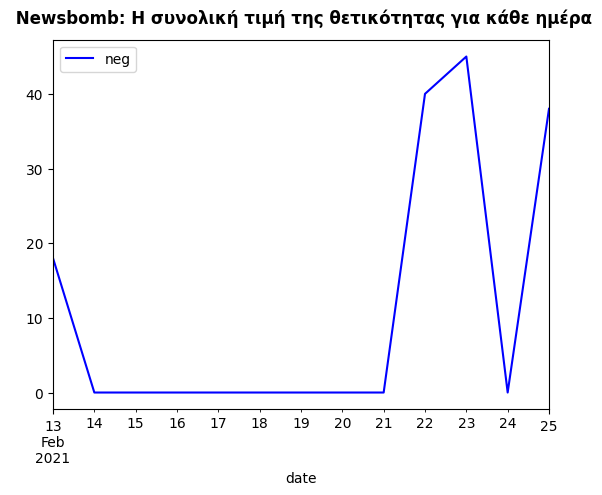

In [102]:
article_df_fa['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()
plt.title(' Newsbomb: Η συνολική τιμή της θετικότητας για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Συνολική τιμή της αρνητικότητας για κάθε ημέρα')

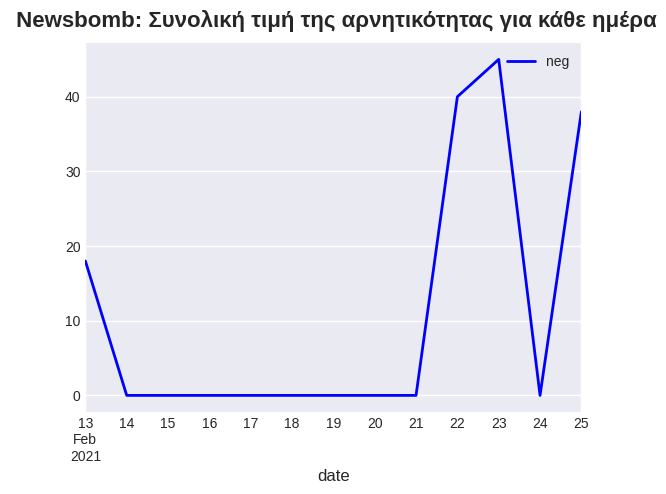

In [122]:
article_df_fa['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()
plt.title(' Newsbomb: Συνολική τιμή της αρνητικότητας για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Εμπιστοσύνη ')

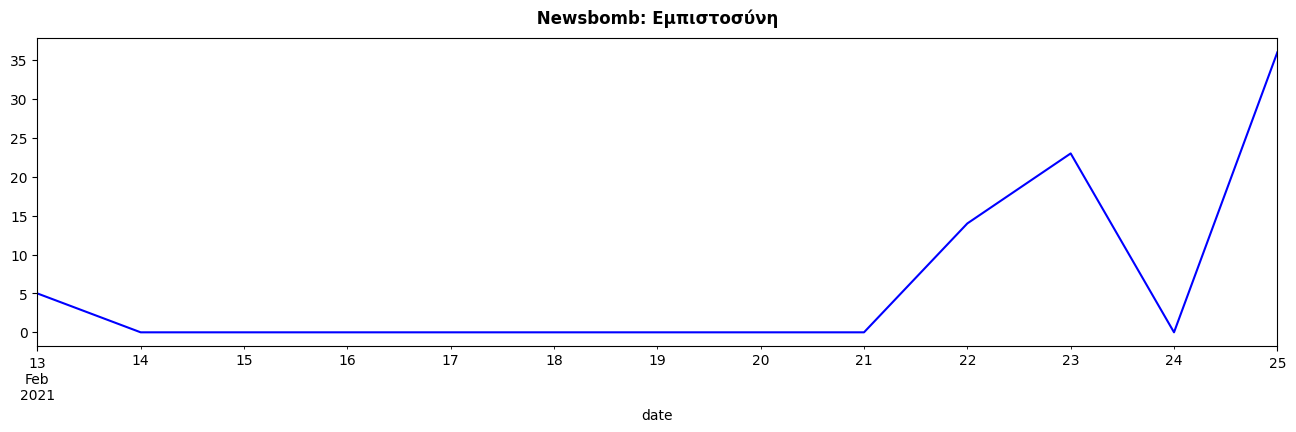

In [110]:
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), color='blue')
plt.title(' Newsbomb: Εμπιστοσύνη ', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Θυμός vs Χαρά')

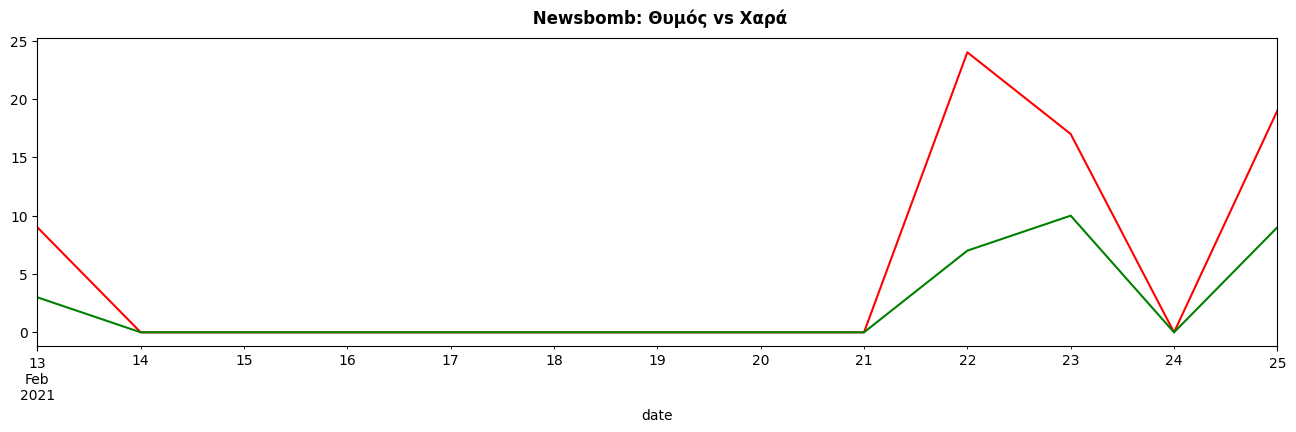

In [108]:
ax = article_df_fa['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
article_df_fa['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
plt.title(' Newsbomb: Θυμός vs Χαρά', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη')

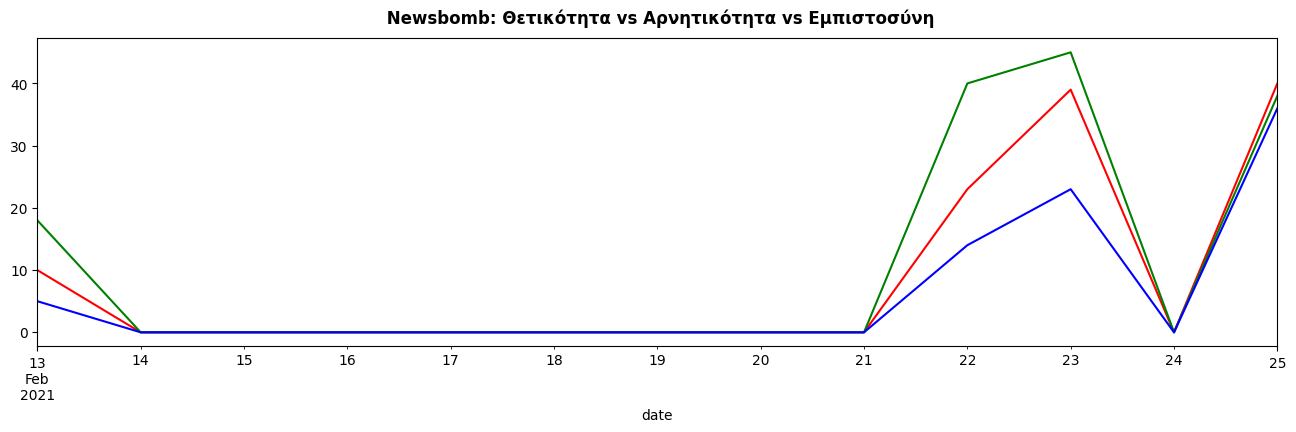

In [109]:
ax = article_df_fa['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
article_df_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
plt.title(' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη', y=1.02, fontweight='bold')

In [111]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [112]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

Text(0.5, 1.02, ' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία')

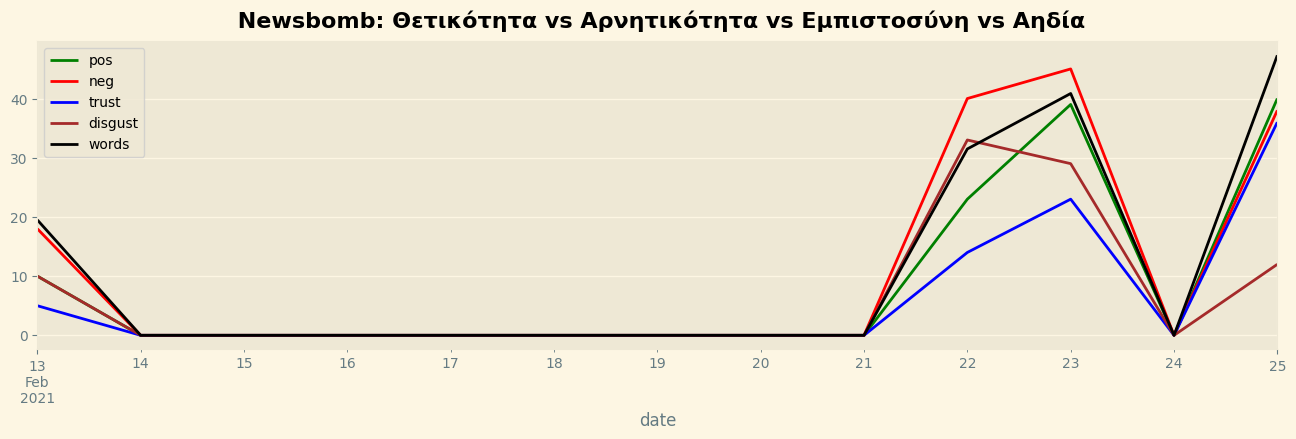

In [113]:
ax = article_df_fa['positive'].resample('D').sum().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
article_df_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
article_df_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
article_df_fa['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(article_df_fa['text'].str.len().resample('D').sum()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
plt.title(' Newsbomb: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία', y=1.02, fontweight='bold')

Text(0.5, 1.02, 'Newsbomb: Θετικότητα (+) vs Αρνητικότητα (-)')

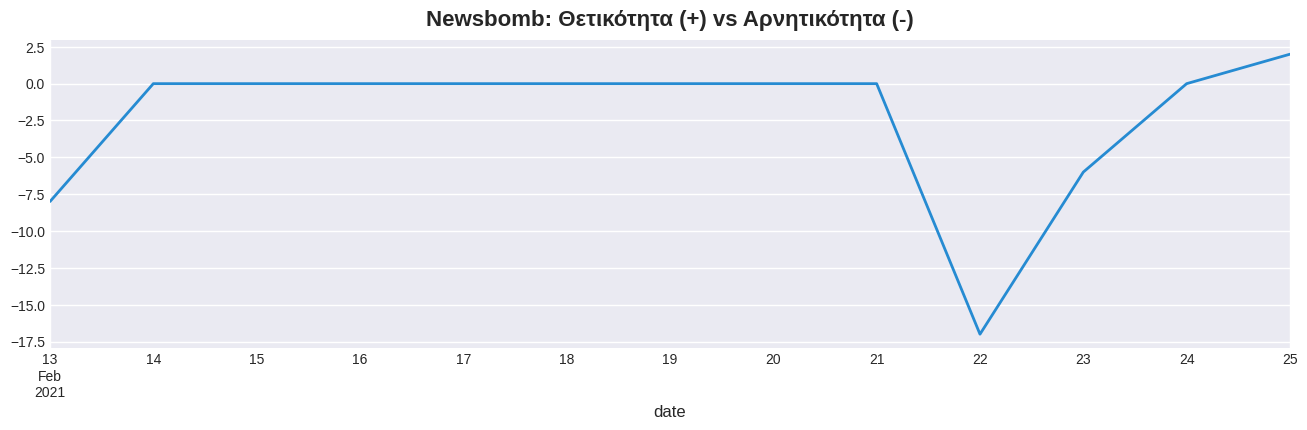

In [118]:
article_df_fa['pos/neg'] = article_df_fa['positive'] - article_df_fa['negative']
article_df_fa['pos/neg'].resample('D').sum().plot(figsize=(16,4))
plt.title('Newsbomb: Θετικότητα (+) vs Αρνητικότητα (-)', y=1.02, fontweight='bold')

In [115]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

In [116]:
article_df_fa['(+)φόβος | θυμός(-)'] = article_df_fa.positive*100//article_df_fa[['fear','anger']].sum(
        axis=1) - article_df_fa.negative*100//article_df_fa[['fear','anger']].sum(axis=1)

Text(0.5, 1.02, ' Newsbomb: Φόβος(+) vs θυμός (-) ')

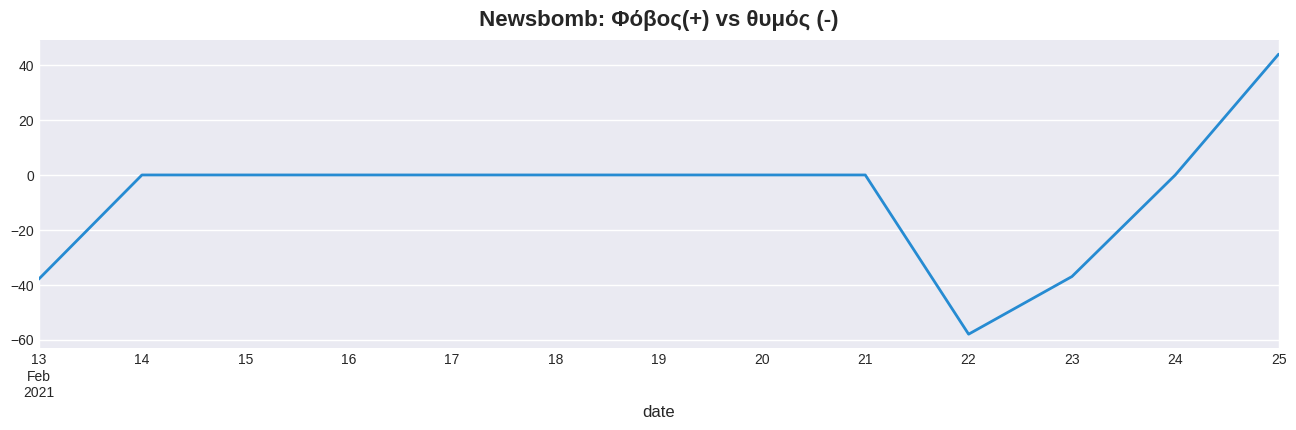

In [117]:
article_df_fa['(+)φόβος | θυμός(-)'].resample('D').sum().plot(figsize=(16,4))
plt.title(' Newsbomb: Φόβος(+) vs θυμός (-) ', y=1.02, fontweight='bold')